# Pre Processing Images

In [ ]:
import numpy as np
from skimage.feature import hog
from skimage import exposure

import matplotlib.pyplot as plt
import cv2

from datetime import datetime
from sklearn.utils import check_random_state
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

## Loading and labelling the images

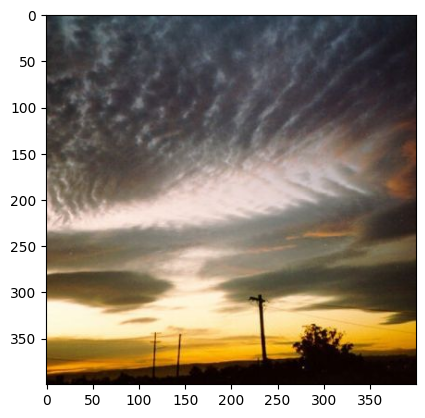

In [5]:
import os
# identifyign folders/labels
cloud_labels = os.listdir("../resources/cloud-images/CCSN_v2")
# Removing the .DS_Store file - autogenerated metadata for a folder - native to macOS
if ".DS_Store" in cloud_labels: cloud_labels.remove(".DS_Store")

labeled_data = {}

for label in cloud_labels:
    cloud_images = os.listdir("../resources/cloud-images/CCSN_v2/" + label)
    for image in cloud_images:
        labeled_data[image] =  [{'label': label}]

sample_image = cv2.imread("../resources/cloud-images/CCSN_v2/Ac/Ac-N001.jpg")
image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

## Preprocessing the Images

In [3]:
train_images = []
train_labels = []

start_datetime = datetime.now()

for (i, image_file) in enumerate(labeled_data):
    #read image
    path = '../resources/cloud-images/CCSN_v2/'+ labeled_data[image_file][0]['label'] + '/' + image_file
    image = cv2.imread(path)
    image = np.array(image)
    fd, hog_image = hog(
        image,
        orientations=16,
        pixels_per_cell=(4, 4),
        cells_per_block=(2, 2),
        visualize=True,
        channel_axis=-1,
    )

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')


    label = cloud_labels.index(labeled_data[image_file][0]['label'])
    tmp_label = labeled_data[image_file][0]['label']

    train_images.append(hog_image_rescaled)
    train_labels.append(label)
    print('Loaded...', '\U0001F483', 'Image', str(i+1), 'is a', tmp_label)
    plt.show()

end_datetime = datetime.now()

NameError: name 'hog' is not defined

In [ ]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

X, y = train_images,train_labels

In [ ]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

print(len(X))

In [ ]:
print('Image Processing Duration: ' + str(end_datetime-start_datetime))

# Splitting the data

test_size = 0.3

train_samples, test_samples, train_samples_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=test_size, random_state=None)